In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
import pandas as pd

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [4]:
# read in the data from an .sdf file
df = PandasTools.LoadSDF('MCHR1_ChEMBL.sdf')
print(df.head())

Failed to patch pandas - unable to change molecule rendering


       chembl_id Mean_pAct Median_pAct  Min_pAct  Max_pAct Stdev_pAct  \
0  CHEMBL1188966   6.79588     6.79588   6.79588   6.79588         0.   
1  CHEMBL1223708  7.958607    7.958607  7.958607  7.958607         0.   
2  CHEMBL1223709  7.346787    7.346787  7.346787  7.346787         0.   
3  CHEMBL1223710  7.677781    7.677781  7.677781  7.677781         0.   
4  CHEMBL1223767  7.167491    7.167491  7.167491  7.167491         0.   

  Count_pAct Standard_relation Confidence_score             ID  \
0          1                 =                9  CHEMBL1188966   
1          1                 =                9  CHEMBL1223708   
2          1                 =                9  CHEMBL1223709   
3          1                 =                9  CHEMBL1223710   
4          1                 =                9  CHEMBL1223767   

                                               ROMol  
0  <rdkit.Chem.rdchem.Mol object at 0x000001DA631...  
1  <rdkit.Chem.rdchem.Mol object at 0x000001DA631...  

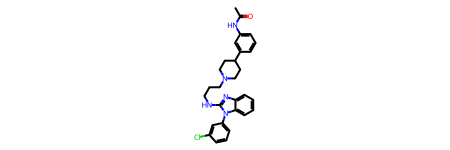

In [8]:
test_mol = df['ROMol'][2]
test_mol

In [10]:
# convert the molecule to a SMILES string
smiles = Chem.MolToSmiles(test_mol)
smiles

'CC(=O)Nc1cccc(C2CCN(CCCNc3nc4ccccc4n3-c3cccc(Cl)c3)CC2)c1'

In [11]:
# Lets extract features from the molecule
from rdkit.Chem import Descriptors

In [22]:
# Calculate the molecular weight
mol_weight = Descriptors.MolWt(test_mol)
# Calculate the number of atoms
num_atoms = test_mol.GetNumAtoms()
# Calculate the number of heavy atoms
num_heavy_atoms = Descriptors.HeavyAtomCount(test_mol)
# Calculate the number of rings
num_rings = Descriptors.RingCount(test_mol)
# Calculate the number of rotatable bonds
num_rotatable_bonds = Descriptors.NumRotatableBonds(test_mol)
# Calculate the number of aromatic rings
num_aromatic_rings = Descriptors.NumAromaticRings(test_mol)
# Calculate the number of hydrogen bond donors
num_hbd = Descriptors.NumHDonors(test_mol)
# Calculate the number of hydrogen bond acceptors
num_hba = Descriptors.NumHAcceptors(test_mol)
# put all the feature in a pandas series, label each feature appropriately
features = pd.Series([mol_weight, num_atoms, num_heavy_atoms, num_rings, num_rotatable_bonds, num_aromatic_rings, num_hbd, num_hba])
features.index = ['mol_weight', 'num_atoms', 'num_heavy_atoms', 'num_rings', 'num_rotatable_bonds', 'num_aromatic_rings', 'num_hbd', 'num_hba']
features

mol_weight             502.062
num_atoms               36.000
num_heavy_atoms         36.000
num_rings                5.000
num_rotatable_bonds      8.000
num_aromatic_rings       4.000
num_hbd                  2.000
num_hba                  5.000
dtype: float64

In [24]:
full_descriptors = Descriptors.CalcMolDescriptors(test_mol)
print(len(full_descriptors))

210


In [21]:
MaxAbsEStateIndex: 11.375775271366665
MaxEStateIndex: 11.375775271366665
MinAbsEStateIndex: 0.028969099771186224
MinEStateIndex: -0.028969099771186224
qed: 0.27726276328317295
SPS: 14.722222222222221
MolWt: 502.06200000000024
HeavyAtomMolWt: 469.8060000000003
ExactMolWt: 501.22953832400003
NumValenceElectrons: 186
NumRadicalElectrons: 0
MaxPartialCharge: 0.22074755957619308
MinPartialCharge: -0.3552777319836742
MaxAbsPartialCharge: 0.3552777319836742
MinAbsPartialCharge: 0.22074755957619308
FpDensityMorgan1: 1.0277777777777777
FpDensityMorgan2: 1.8333333333333333
FpDensityMorgan3: 2.638888888888889
BCUT2D_MWHI: 35.49569217926681
BCUT2D_MWLOW: 9.889038706235073
BCUT2D_CHGHI: 2.2051354140716772
BCUT2D_CHGLO: -2.3197540176389926
BCUT2D_LOGPHI: 2.298135122265209
BCUT2D_LOGPLOW: -2.340036993304387
BCUT2D_MRHI: 6.303065156558327
BCUT2D_MRLOW: -0.11373836739527134
AvgIpc: 3.2498694835947597
BalabanJ: 1.1535059293026688
BertzCT: 1342.5144639460864
Chi0: 24.907202147189928
Chi0n: 20.583154517743935
Chi0v: 21.33908346376239
Chi1: 17.56368328351281
Chi1n: 12.63863345393423
Chi1v: 13.016597926943456
Chi2n: 9.442299407920148
Chi2v: 9.878735188392133
Chi3n: 6.827401356977092
Chi3v: 7.062498459764831
Chi4n: 5.087526475933189
Chi4v: 5.272054855160818
HallKierAlpha: -3.349999999999999
Ipc: 218452118.8522125
Kappa1: 24.349085594531065
Kappa2: 11.145357931718909
Kappa3: 5.717402814343207
LabuteASA: 216.8339723066981
PEOE_VSA1: 15.533486938863138
PEOE_VSA10: 0.0
PEOE_VSA11: 0.0
PEOE_VSA12: 11.855519010338
PEOE_VSA13: 0.0
PEOE_VSA14: 0.0
PEOE_VSA2: 9.361636831863176
PEOE_VSA3: 4.9839785209472085
PEOE_VSA4: 0.0
PEOE_VSA5: 0.0
PEOE_VSA6: 41.932775232540564
PEOE_VSA7: 92.84266110360544
PEOE_VSA8: 24.17851319402809
PEOE_VSA9: 16.720787709916085
SMR_VSA1: 4.794537184071822
SMR_VSA10: 40.1772466104866
SMR_VSA2: 0.0
SMR_VSA3: 14.450987899589041
SMR_VSA4: 0.0
SMR_VSA5: 32.104108114630044
SMR_VSA6: 36.812602831662964
SMR_VSA7: 83.38248962697766
SMR_VSA8: 0.0
SMR_VSA9: 5.687386274683562
SlogP_VSA1: 10.633577208012662
SlogP_VSA10: 11.635725555670057
SlogP_VSA11: 0.0
SlogP_VSA12: 11.600939890232516
SlogP_VSA2: 46.537193252590846
SlogP_VSA3: 4.794537184071822
SlogP_VSA4: 0.0
SlogP_VSA5: 37.667559606327046
SlogP_VSA6: 72.79640482153933
SlogP_VSA7: 5.022633313741326
SlogP_VSA8: 16.720787709916085
SlogP_VSA9: 0.0
TPSA: 62.190000000000005
EState_VSA1: 0.0
EState_VSA10: 4.794537184071822
EState_VSA11: 0.0
EState_VSA2: 5.907179729351506
EState_VSA3: 10.940539359902719
EState_VSA4: 73.79800375801447
EState_VSA5: 5.563451491696996
EState_VSA6: 6.923737199690624
EState_VSA7: 48.53093654769288
EState_VSA8: 44.36605486050093
EState_VSA9: 16.584918411179725
VSA_EState1: 2.140661912424889
VSA_EState10: 6.278699987531072
VSA_EState2: 18.767611432101653
VSA_EState3: 7.170563545228408
VSA_EState4: 5.235796242146362
VSA_EState5: 1.3616913729323472
VSA_EState6: 24.355315680494815
VSA_EState7: 3.3238742838637156
VSA_EState8: 5.643563321054517
VSA_EState9: 0.0
FractionCSP3: 0.3103448275862069
HeavyAtomCount: 36
NHOHCount: 2
NOCount: 6
NumAliphaticCarbocycles: 0
NumAliphaticHeterocycles: 1
NumAliphaticRings: 1
NumAromaticCarbocycles: 3
NumAromaticHeterocycles: 1
NumAromaticRings: 4
NumHAcceptors: 5
NumHDonors: 2
NumHeteroatoms: 7
NumRotatableBonds: 8
NumSaturatedCarbocycles: 0
NumSaturatedHeterocycles: 1
NumSaturatedRings: 1
RingCount: 5
MolLogP: 6.318900000000006
MolMR: 148.34739999999977
fr_Al_COO: 0
fr_Al_OH: 0
fr_Al_OH_noTert: 0
fr_ArN: 0
fr_Ar_COO: 0
fr_Ar_N: 2
fr_Ar_NH: 0
fr_Ar_OH: 0
fr_COO: 0
fr_COO2: 0
fr_C_O: 1
fr_C_O_noCOO: 1
fr_C_S: 0
fr_HOCCN: 0
fr_Imine: 0
fr_NH0: 3
fr_NH1: 2
fr_NH2: 0
fr_N_O: 0
fr_Ndealkylation1: 0
fr_Ndealkylation2: 1
fr_Nhpyrrole: 0
fr_SH: 0
fr_aldehyde: 0
fr_alkyl_carbamate: 0
fr_alkyl_halide: 0
fr_allylic_oxid: 0
fr_amide: 1
fr_amidine: 0
fr_aniline: 2
fr_aryl_methyl: 0
fr_azide: 0
fr_azo: 0
fr_barbitur: 0
fr_benzene: 3
fr_benzodiazepine: 0
fr_bicyclic: 1
fr_diazo: 0
fr_dihydropyridine: 0
fr_epoxide: 0
fr_ester: 0
fr_ether: 0
fr_furan: 0
fr_guanido: 0
fr_halogen: 1
fr_hdrzine: 0
fr_hdrzone: 0
fr_imidazole: 1
fr_imide: 0
fr_isocyan: 0
fr_isothiocyan: 0
fr_ketone: 0
fr_ketone_Topliss: 0
fr_lactam: 0
fr_lactone: 0
fr_methoxy: 0
fr_morpholine: 0
fr_nitrile: 0
fr_nitro: 0
fr_nitro_arom: 0
fr_nitro_arom_nonortho: 0
fr_nitroso: 0
fr_oxazole: 0
fr_oxime: 0
fr_para_hydroxylation: 2
fr_phenol: 0
fr_phenol_noOrthoHbond: 0
fr_phos_acid: 0
fr_phos_ester: 0
fr_piperdine: 1
fr_piperzine: 0
fr_priamide: 0
fr_prisulfonamd: 0
fr_pyridine: 0
fr_quatN: 0
fr_sulfide: 0
fr_sulfonamd: 0
fr_sulfone: 0
fr_term_acetylene: 0
fr_tetrazole: 0
fr_thiazole: 0
fr_thiocyan: 0
fr_thiophene: 0
fr_unbrch_alkane: 1
fr_urea: 0
for value, descriptor in full_descriptors.items():
    print(f'{value}: {descriptor}')

MaxAbsEStateIndex: 11.375775271366665
MaxEStateIndex: 11.375775271366665
MinAbsEStateIndex: 0.028969099771186224
MinEStateIndex: -0.028969099771186224
qed: 0.27726276328317295
SPS: 14.722222222222221
MolWt: 502.06200000000024
HeavyAtomMolWt: 469.8060000000003
ExactMolWt: 501.22953832400003
NumValenceElectrons: 186
NumRadicalElectrons: 0
MaxPartialCharge: 0.22074755957619308
MinPartialCharge: -0.3552777319836742
MaxAbsPartialCharge: 0.3552777319836742
MinAbsPartialCharge: 0.22074755957619308
FpDensityMorgan1: 1.0277777777777777
FpDensityMorgan2: 1.8333333333333333
FpDensityMorgan3: 2.638888888888889
BCUT2D_MWHI: 35.49569217926681
BCUT2D_MWLOW: 9.889038706235073
BCUT2D_CHGHI: 2.2051354140716772
BCUT2D_CHGLO: -2.3197540176389926
BCUT2D_LOGPHI: 2.298135122265209
BCUT2D_LOGPLOW: -2.340036993304387
BCUT2D_MRHI: 6.303065156558327
BCUT2D_MRLOW: -0.11373836739527134
AvgIpc: 3.2498694835947597
BalabanJ: 1.1535059293026688
BertzCT: 1342.5144639460864
Chi0: 24.907202147189928
Chi0n: 20.58315451774

In [26]:
# We can also calculate the fingerprints of the molecule. The fingerprints are a way to encode the structure of the molecule into a binary vector.
# The most common type of fingerprint is the Morgan fingerprint, which is a circular fingerprint.
# The Morgan fingerprint is calculated by taking the substructures of the molecule and encoding them into a binary vector.
# The Morgan fingerprint is calculated using the GetMorganFingerprintAsBitVect function from the rdkit.Chem library.
from rdkit.Chem import AllChem

In [30]:
fingerprints = AllChem.GetMorganFingerprintAsBitVect(test_mol, 2, nBits=1024)

f = Chem.MolToMolBlock(test_mol)
print(f)

CHEMBL1223709
     RDKit          2D

 36 40  0  0  0  0  0  0  0  0999 V2000
    1.8913    7.1612    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3038    6.4468    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1288    6.4468    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.8913    5.7323    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.3038    5.0178    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1288    5.0178    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5413    4.3034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1288    3.5889    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3038    3.5889    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8913    4.3034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8913    2.8744    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3038    2.1599    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8913    1.4455    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0663  

In [32]:
print(fingerprints.ToBitString())

0000000000000001000000000100000001000000000001000000000000000000100000000100000010000000000000000000000000000000000000000100000010000000000000000000000000000100000001000000000100000000100000010000000000000000000000001000000000000000000001000000010000000001000001000000000001000000000000000100000000000100000000000000000000000000000000000000000000000010000011000000000000000000001000000000000010000000000000000000000000000100000000000000000000000000000000001010000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000001000000000000000000000000010000100000000000000000000000000000000000000000000001000000000010010000010000000100000000000000010000000000000000000100000000000000000000001000000000000000000000000000000000000000010000000000000000100000001000010001100001000000000000000000000001000000000000000001000000000000000000000000010000000000010000010000000000000000000000000000000010000000010010000000001000000000000000000001000000100000000000000010000000

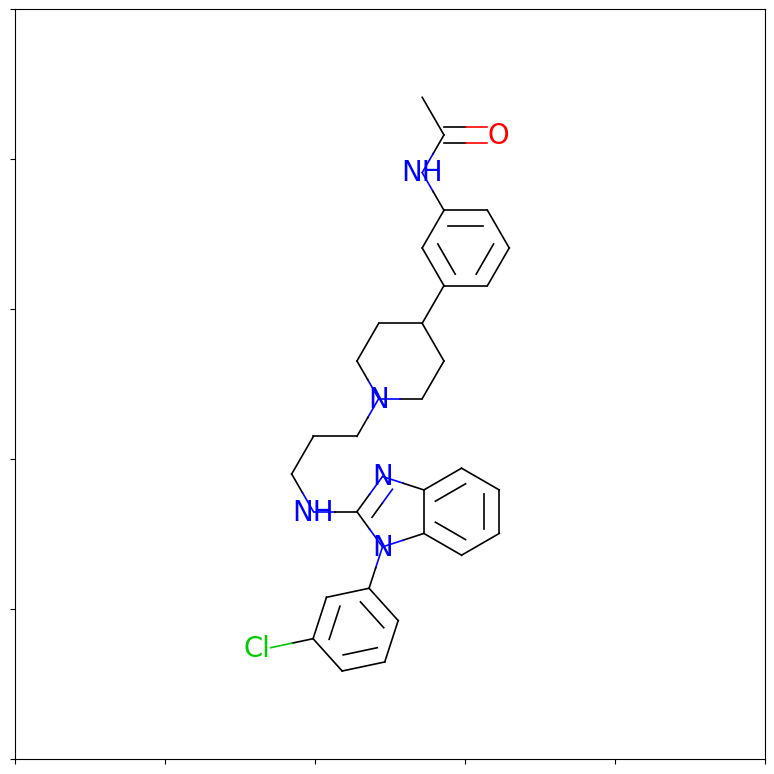

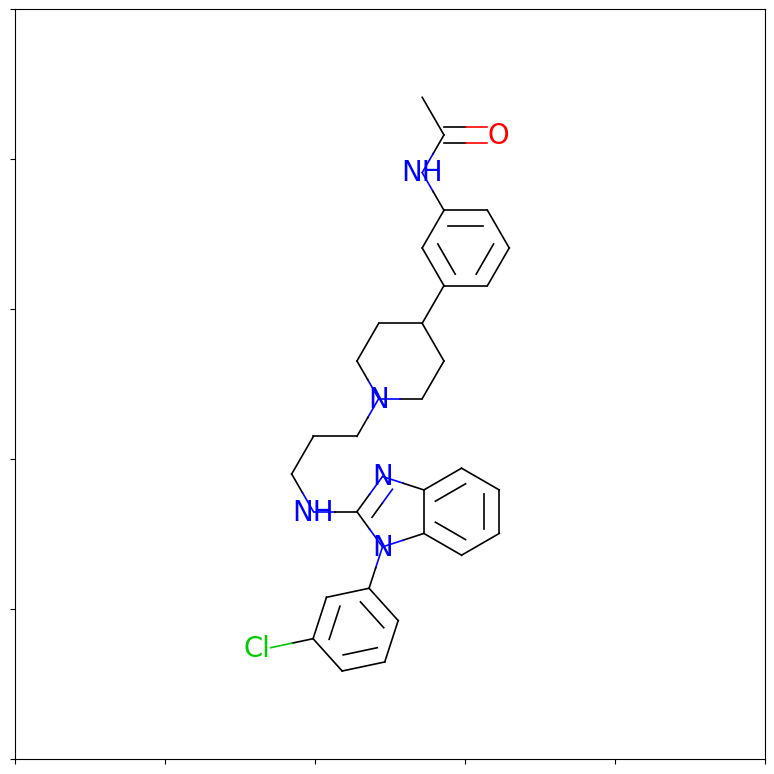

In [33]:
# show the molecule in 3D
from rdkit.Chem import Draw
Draw.MolToMPL(test_mol) # this will open a window with the 3D structure of the molecule